# HW3b

## Problem 1

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from numpy import linalg as LA
import random
import copy
from sklearn.metrics import confusion_matrix
from scipy.spatial import distance_matrix
from scipy.spatial.distance import pdist,squareform

In [2]:
df = pd.read_csv("kMeansData.csv")

In [3]:
x1 = np.array(df['x1'].values).reshape(-1,1)
x2 = np.array(df['x2'].values).reshape(-1,1)
X = np.hstack([x1,x2])

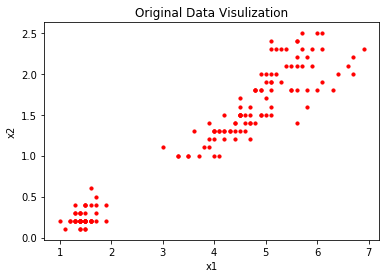

In [4]:
plt.scatter(x1, x2, c = 'red', s = 10)
plt.title('Original Data Visulization')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [5]:
# randomly generate K numbers in range of length of X (K is the numer of cluster we need)
# come out the corresponding row in X
centroids = X[random.sample(range(1, len(X)), 3)] 

In [6]:
# initial centroids
centroids

array([[5.6, 2.1],
       [5. , 1.5],
       [5.3, 2.3]])

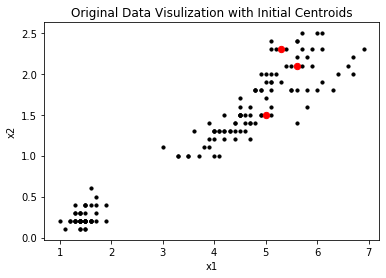

In [7]:
# plot the data with initial centroids
plt.scatter(x1, x2, c = 'black', s = 10)
plt.scatter(centroids[:,0], centroids[:,1], c = 'red', s = 40)
plt.title('Original Data Visulization with Initial Centroids')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [8]:
# set some constraints
max_iteration = 1000 # set the max iteration as 1000
difference = 1 
iteration = 0 # set the iteration initially as 0
cluster = [0]*len(X) # create a length of X list to store the label result of each row
newC = np.zeros((3,2)) # create a 3 by 2 zero array to save new centroids
# max iteration is 1000 or difference less than 0.001
while iteration < max_iteration and difference != 0:    
    for i in range(len(X)): # we want to run a for loop in X (all the data we have)
        # use one row of data minus each centroid(3 by 2 matrix)
        # apply L2 norm to each row of the 'minus' result that's why we use axis = 1 in argument
        distance = LA.norm(X[i] - centroids, axis = 1)
        # argmin function will return the position of minimum distance in distance array
        label = np.argmin(distance)
        # we save the label of that centroid into cluster
        cluster[i] = label
        # now we get a list of labeled cluster
    for k in range(0,3): # we want to loop in k centroid, in this case, we have 3 centroids
        datalist = [] # create a list to save the data corresponding to that centroid
        for row in range(len(X)): # loop in X which is our data array
            if cluster[row] == k: # when label in cluster list is equal to that label of centroid
                datalist.append(X[row]) # datalist will append that row of X
        # after this for loop, we would have a list of data that is corresponding to that centroid        
        newC[k] = np.mean(datalist, axis = 0)
        # then we calculate mean of array in a list
        # because we append data horizontally, we set axis as 0 to calculate the mean horizontally
    # after this for loop, we could have 3 new centroids saved in newC
    difference = LA.norm(newC - centroids) # calculate the difference between new and old centroids using L2 norm
    iteration+=1 # count for iteration
    # copy value of newC to centroids
    centroids = copy.deepcopy(newC) # we need deepcopy to conpy the value from newC, we dont want to make any change of newC

In [9]:
centroids

array([[5.62608696, 2.04782609],
       [1.462     , 0.246     ],
       [4.29259259, 1.35925926]])

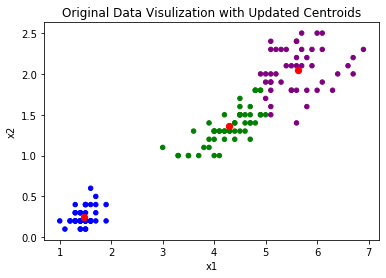

In [10]:
color = np.array(['purple', 'blue', 'green'])
plt.scatter(x1, x2, c = color[cluster], s = 20)
plt.scatter(centroids[:,0], centroids[:,1], c = 'red', s = 40)
plt.title('Original Data Visulization with Updated Centroids')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

## Problem 2

### Question 1

In [11]:
dfp2 = pd.read_csv("rbfClassification.csv")

In [12]:
x1 = np.array(dfp2['x1'].values).reshape(-1,1)
x2 = np.array(dfp2['x2'].values).reshape(-1,1)
X = np.hstack([x1,x2])

In [13]:
centroids = X[random.sample(range(1, len(X)), 2)] 

In [14]:
centroids

array([[ 1.51379205, -2.31264989],
       [ 1.95773338,  2.45968038]])

In [15]:
# set some constraints
max_iteration = 1000 # set the max iteration as 1000
difference = 1 
iteration = 0 # set the iteration initially as 0
cluster = [0]*len(X) # create a length of X list to store the label result of each row
newC = np.zeros((2,2)) # create a 3 by 2 zero array to save new centroids
# max iteration is 1000 or difference less than 0.001
while iteration < max_iteration and difference != 0:    
    for i in range(len(X)): # we want to run a for loop in X (all the data we have)
        # use one row of data minus each centroid(3 by 2 matrix)
        # apply L2 norm to each row of the 'minus' result that's why we use axis = 1 in argument
        distance = LA.norm(X[i] - centroids, axis = 1)
        # argmin function will return the position of minimum distance in distance array
        label = np.argmin(distance)
        # we save the label of that centroid into cluster
        cluster[i] = label
        # now we get a list of labeled cluster
    for k in range(0,2): # we want to loop in k centroid, in this case, we have 3 centroids
        datalist = [] # create a list to save the data corresponding to that centroid
        for row in range(len(X)): # loop in X which is our data array
            if cluster[row] == k: # when label in cluster list is equal to that label of centroid
                datalist.append(X[row]) # datalist will append that row of X
        # after this for loop, we would have a list of data that is corresponding to that centroid        
        newC[k] = np.mean(datalist, axis = 0)
        # then we calculate mean of array in a list
        # because we append data horizontally, we set axis as 0 to calculate the mean horizontally
    # after this for loop, we could have 3 new centroids saved in newC
    difference = LA.norm(newC - centroids) # calculate the difference between new and old centroids using L2 norm
    iteration+=1 # count for iteration
    # copy value of newC to centroids
    centroids = copy.deepcopy(newC) # we need deepcopy to conpy the value from newC, we dont want to make any change of newC

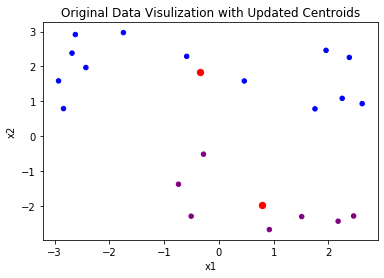

In [16]:
color = np.array(['purple', 'blue', 'green'])
plt.scatter(x1, x2, c = color[cluster], s = 20)
plt.scatter(centroids[:,0], centroids[:,1], c = 'red', s = 40)
plt.title('Original Data Visulization with Updated Centroids')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [17]:
centroids

array([[ 0.7932724 , -1.99193126],
       [-0.33773906,  1.84417764]])